# DTSA 5509- Introduction to Machine Learning: Supervised Learning
# Final Project
## by Adam Miyata


## Project Topic

The goal of this project is to train a ML algorithm to use data about loans from non-banking financial institutions to determine whether a given loan will default or not (i.e. determine whether or not the loan will be repaid to the lender, or if the borrower will be unable to repay the borrowed amount). This is a classification problem where a loan will be predicted to be classified as "Default" if the loan is predicted to default, or "No default" if the loan is not predicted to default. 

This type of problem is vital for lenders to understand, since, providing loans that are likely to default will often result in insolvency and business failure. It is critical that lenders understand the risk that their borrowers bring.

To get to a point where the model can make predictions, I will load the data into a pandas dataframe, perform exploratory data analysis on the data, fit & train a ML model, tune & parameterize the model for optimization, and analyze the results.

### Dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

### Data

The data used in this assignment is the "NBFI Vehicle Loan repayment Dataset" from Kaggle (linked below in the Data Summary section). The files included are:
1. Data_Dictionary.csv
2. Test_Dataset.csv
3. Train_Dataset.csv

We are dealing with tabulated data in this case.

### Data summary

1. 'Data_Dictionary.csv' is simply a listing of the columns (aka features/variables/attributes) for the files, along with a description of each column. There are 40 columns in total (I will refer to these as 'features' from this point forward) in the train/test datasets so the data dictionary has 40 rows. Of the 40 features, 10 are numeric, and 30 are categorical ('ID' is technically numeric, but will be treated as categorical). 
2. 'Train_Dataset.csv' is the largest file. Running a tail on the dataset, we can see that there are 121856 total rows, and (as mentioned above) 40 columns. 
3. 'Test_Dataset.csv' is slightly smaller than the training dataset, with 80,900 rows (and again, 40 columns).

One important note is that the data has already been split into training and test data sets for us. I would have preferred to do this myself, but I think it's fine to work with it this way.

None of the data files are very large; the largest file is the training dataset, at 20.3 MB. 

Data source (also see references section): https://www.kaggle.com/datasets/meastanmay/nbfi-vehicle-loan-repayment-dataset

In [3]:
#Read in data to pandas dataframes
dat_dict = pd.read_csv('Data/Data_Dictionary.csv')
df = pd.read_csv('Data/Train_Dataset.csv')
df_test = pd.read_csv('Data/Test_Dataset.csv')

In [4]:
#List data types of training data
df.dtypes

ID                              int64
Client_Income                  object
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                  object
Loan_Annuity                   object
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative     object
Age_Days                       object
Employed_Days                  object
Registration_Days              object
ID_Days                        object
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation              object
Client_Famil

In [5]:
#Show number of rows, columns for training dataset
df.shape

(121856, 40)

## Data cleaning & Exploratory Data Analysis

Now let's take a look at the data to see what's missing, anomolous, or just invalid.

In [6]:
#Obtaining basic information about features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [7]:
#Here I'll use the describe method to get a quick summary of the numeric data
df.describe()

,ID,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
count,1.218560e+05,118275.000000,118232.000000,118221.000000,118195.000000,118218.000000,41761.000000,121856.000000,121856.000000,121856.000000,119446.000000,119447.000000,119428.000000,118193.000000,53021.000000,116170.000000,59928.000000,118192.000000,103316.000000,121856.000000
mean,1.216093e+07,0.342854,0.332262,0.499175,0.692060,0.417779,12.157324,0.999992,0.200499,0.281201,2.154329,2.030038,3.159736,12.063100,0.501213,0.518625,0.117428,962.106056,1.891082,0.080792
std,3.517694e+04,0.474665,0.471026,0.500001,0.461644,0.728802,12.056079,0.002865,0.400375,0.449587,0.912686,0.504407,1.759045,3.280695,0.211204,0.740248,0.107974,827.976726,1.861921,0.272517
min,1.210000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.014568,0.000005,0.000000,0.000000,0.000000,0.000000
25%,1.213046e+07,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.333481,0.390164,0.057700,272.000000,0.000000,0.000000
50%,1.216093e+07,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,1.000000,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.504657,0.564978,0.088700,755.000000,1.000000,0.000000
75%,1.219139e+07,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,0.673890,0.664011,0.148500,1570.000000,3.000000,0.000000
max,1.222186e+07,1.000000,1.000000,1.000000,1.000000,19.000000,69.000000,1.000000,1.000000,1.000000,16.000000,3.000000,6.000000,23.000000,0.945741,100.000000,1.000000,4185.000000,22.000000,1.000000


Next, I'm going to take a look at the output above to check for outliers, primarily with max/min.  One client apparently has 19 children; this is interesting and certainly raises a flag but it's also plausible, so I'll leave it. There's not much else to note in terms of outliers when looking at maximums and minimums. I'm a little surprised, but perhaps this data was partially cleaned before being uploaded to Kaggle.

### Dropping columns

Browsing through the features, there are a few that seem like they may not need to be included in analysis; for example, the features 'Mobile_Tag', 'Homephone_Tag', and 'Workphone_Working' seem like they may be irrelevant. Looking at the data dictionary, 'Mobile_Tag' will be set as '1' if the client provided a phone number, or '0' if not. Similarly, 'Homephone_Tag' is set to '1' if a phone number was provided by the client, and 'Workphone_Working' is set to '1' if the client's work phone number is valid. 

Given that information, I will not drop these features since it is plausible that they could have an effect on the probability of default for a loan. Not providing phone numbers and having a non-working work-phone number may be indicators a client is irresponsible, or is perhaps applying for a loan fraudulently (e.g. someone could write a program to apply for loans at many institutions but neglect to generate fake phone numbers).

In [8]:
#Let's look at features showing the sum of their missing values
df.isna().sum()

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating          

In [9]:
#Now let's show missing values as percentage of total values
(df.isna().sum()/121856)*100

ID                             0.000000
Client_Income                  2.960051
Car_Owned                      2.938715
Bike_Owned                     2.974002
Active_Loan                    2.983029
House_Own                      3.004366
Child_Count                    2.985491
Credit_Amount                  2.980567
Loan_Annuity                   3.948923
Accompany_Client               1.432839
Client_Income_Type             3.037191
Client_Education               2.991236
Client_Marital_Status          2.850085
Client_Gender                  1.980206
Loan_Contract_Type             2.996159
Client_Housing_Type            3.025702
Population_Region_Relative     3.985852
Age_Days                       2.954307
Employed_Days                  2.994518
Registration_Days              2.965796
ID_Days                        4.897584
Own_House_Age                 65.729221
Mobile_Tag                     0.000000
Homephone_Tag                  0.000000
Workphone_Working              0.000000


Setting the threshhold at 10% for missing values, we'll drop:
Own_House_Age, Client_Occupation, Score_Source_1, Score_Source_3, Social_Circle_Default, and Credit_Bureau

That's too bad because a client's occupation almost certainly has an impact on their credit risk, but we are not in a position to gather more data, and the number of missing values is much too high to impute.

In [10]:
#Drop features with missing value % over threshhold
update_df = df.drop(['Own_House_Age', 'Client_Occupation', 'Score_Source_1', 'Score_Source_3', 'Social_Circle_Default', 
                     'Credit_Bureau'], axis=1)

#Set the df variable to the new dataframe
df = update_df

We now have 34 features in total after dropping those 6. Next, we should look for duplicate rows:

In [11]:
#Let's also look for duplicate rows
df.loc[df.duplicated()]

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Phone_Change,Default


There are no duplicates! That's good news; further, I don't see any features where having duplicate values would indicate an issue. For example, 'Car_Owned' could certainly have many duplicates since many people may own the same make/model of car.

### Imputing data
Next, let's deal with the features that had missing values that were under the 10% threshhold. These were:

In [12]:
pctgs = (df.isna().sum()/121856)*100
for index, p in pctgs.items():
    if p!=0:
        print(index, p)

Client_Income 2.9600512079831933
Car_Owned 2.9387145483193278
Bike_Owned 2.974002100840336
Active_Loan 2.983029149159664
House_Own 3.0043658088235294
Child_Count 2.9854910714285716
Credit_Amount 2.9805672268907566
Loan_Annuity 3.948923319327731
Accompany_Client 1.4328387605042017
Client_Income_Type 3.03719143907563
Client_Education 2.9912355567226894
Client_Marital_Status 2.8500853466386555
Client_Gender 1.980206144957983
Loan_Contract_Type 2.9961594012605044
Client_Housing_Type 3.025702468487395
Population_Region_Relative 3.9858521533613445
Age_Days 2.9543067226890756
Employed_Days 2.9945181197478994
Registration_Days 2.9657956932773106
ID_Days 4.8975840336134455
Client_Family_Members 1.9777442226890756
Cleint_City_Rating 1.976923581932773
Application_Process_Day 1.9925157563025209
Application_Process_Hour 3.0060070903361344
Type_Organization 2.9616924894957983
Score_Source_2 4.6661633403361344
Phone_Change 3.006827731092437


Of the features listed above, 'Client_Income', 'Child_Count', 'Credit_Amount', 'Loan Annuity', 'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days', 'Client_Family_Members', and 'Score_Source_2' are numeric, so we'll use either the mean or median data value depending on the distribution of the data (i.e. is data skewed or not?). 

Let's plot the data for these features to get an idea of their distributions:


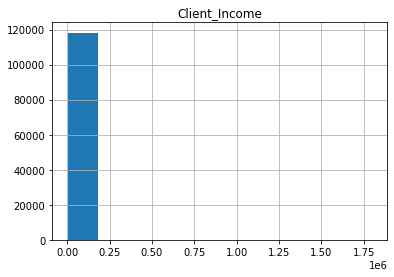

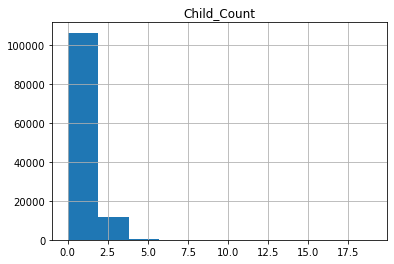

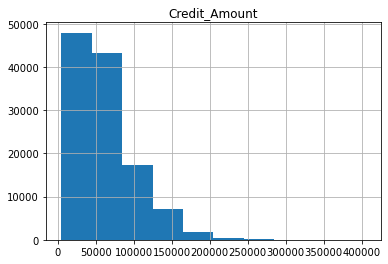

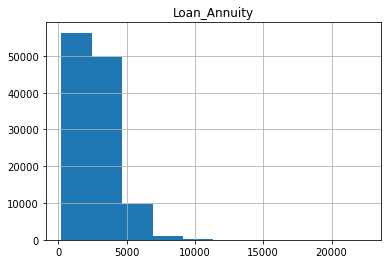

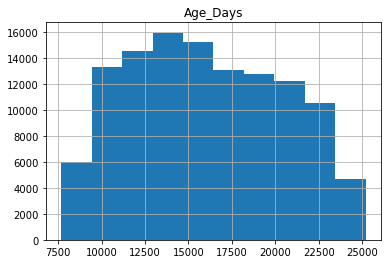

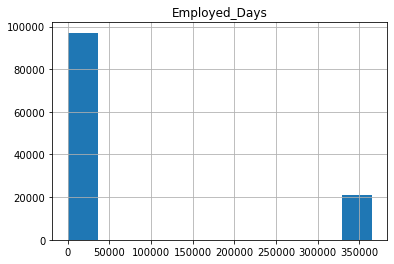

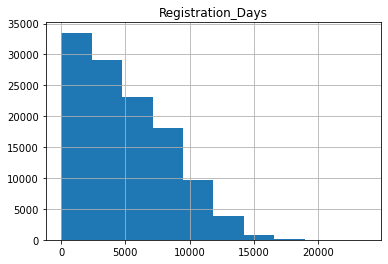

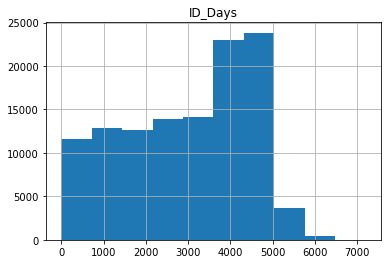

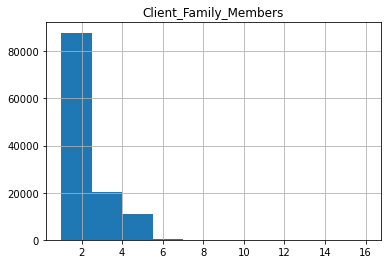

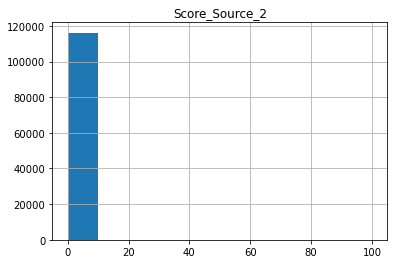

In [13]:
#Initialize list of numeric features needing imputation
numeric_impute = ['Client_Income', 'Child_Count', 'Credit_Amount', 'Loan_Annuity', 'Age_Days', 'Employed_Days', 
                  'Registration_Days', 'ID_Days', 'Client_Family_Members', 'Score_Source_2']

#Handle non-numeric characters in data, and set numeric data types
df.Client_Income.replace("$",np.nan,inplace=True)
df.Client_Income=pd.to_numeric(df.Client_Income)

df.Credit_Amount.replace("&",np.nan,inplace=True)
df.Credit_Amount.replace("$",np.nan,inplace=True)
df.Credit_Amount = df.Credit_Amount.astype(float)

df.Loan_Annuity.replace("$",np.nan,inplace=True)
df.Loan_Annuity.replace("#VALUE!",np.nan,inplace=True)
df.Loan_Annuity = pd.to_numeric(df.Loan_Annuity)

df.Age_Days.replace("x",np.nan,inplace=True)
df.Age_Days = pd.to_numeric(df.Age_Days)

df.Employed_Days.replace("x",np.nan,inplace=True)
df.Employed_Days = pd.to_numeric(df.Employed_Days)

df.Registration_Days.replace("x",np.nan,inplace=True)
df.Registration_Days = pd.to_numeric(df.Registration_Days)

df.ID_Days.replace("x",np.nan,inplace=True)
df.ID_Days = pd.to_numeric(df.ID_Days)

for c in numeric_impute:
    df[c].hist()
    plt.title(c)
    plt.show()

Based on the histograms above, data distributions are skewed for every numeric feature with the exception of Age_Days, which resembles more of a normal distribution. Therefore, we should replace null values with the median value in each feature except Age_Days, where we'll use the mean to replace nulls.

In [14]:
#'Score_Source_2'
#Impute 'Client_Income' with median
client_income_median = df['Client_Income'].median()
df['Client_Income'] = df['Client_Income'].fillna(client_income_median)

#Impute 'Child_Count' with median
child_count_median = df['Child_Count'].median()
df['Child_Count'] = df['Child_Count'].fillna(child_count_median)

#Impute 'Credit_Amount' with median
credit_amount_median = df['Credit_Amount'].median()
df['Credit_Amount'] = df['Credit_Amount'].fillna(credit_amount_median)

#Impute 'Loan_Annuity' with median
loan_annuity_median = df['Loan_Annuity'].median()
df['Loan_Annuity'] = df['Loan_Annuity'].fillna(loan_annuity_median)

#Impute 'Age_Days' with mean
age_days_mean = df['Age_Days'].mean()
df['Age_Days'] = df['Age_Days'].fillna(age_days_mean)

#Impute 'Employed_Days' with median
employed_days_median = df['Employed_Days'].median()
df['Employed_Days'] = df['Employed_Days'].fillna(employed_days_median)

#Impute 'Registration_Days' with median
registration_days_median = df['Registration_Days'].median()
df['Registration_Days'] = df['Registration_Days'].fillna(registration_days_median)

#Impute 'ID_Days' with median
id_days_median = df['ID_Days'].median()
df['ID_Days'] = df['ID_Days'].fillna(id_days_median)

#Impute 'Client_Family_Members' with median
client_family_members_median = df['Client_Family_Members'].median()
df['Client_Family_Members'] = df['Client_Family_Members'].fillna(client_family_members_median)

#Impute 'Score_Source_2' with median
score_source_2_median = df['Score_Source_2'].median()
df['Score_Source_2'] = df['Score_Source_2'].fillna(score_source_2_median)

In [15]:
#Again, show null values as percentage of total
(df.isna().sum()/121856)*100

ID                            0.000000
Client_Income                 0.000000
Car_Owned                     2.938715
Bike_Owned                    2.974002
Active_Loan                   2.983029
House_Own                     3.004366
Child_Count                   0.000000
Credit_Amount                 0.000000
Loan_Annuity                  0.000000
Accompany_Client              1.432839
Client_Income_Type            3.037191
Client_Education              2.991236
Client_Marital_Status         2.850085
Client_Gender                 1.980206
Loan_Contract_Type            2.996159
Client_Housing_Type           3.025702
Population_Region_Relative    3.985852
Age_Days                      0.000000
Employed_Days                 0.000000
Registration_Days             0.000000
ID_Days                       0.000000
Mobile_Tag                    0.000000
Homephone_Tag                 0.000000
Workphone_Working             0.000000
Client_Family_Members         0.000000
Cleint_City_Rating       

We're now down to 17 features with missing values. Let's deal with these categorical features next. We will impute missing values using the most frequent data value in the feature (i.e. the mode of the distribution).

In [16]:
#Initialize list of numeric features needing imputation
categorical_impute = ['Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Accompany_Client', 'Client_Income_Type', 
'Client_Education', 'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type', 
'Population_Region_Relative', 'Cleint_City_Rating', 'Application_Process_Day', 'Application_Process_Hour', 'Type_Organization',
'Phone_Change']

#Impute categorical features with mode of feature
for f in categorical_impute:
    most_freq = df[f].mode()[0]
    df[f] = df[f].fillna(most_freq)


In [17]:
#Double check that there are no more features with missing values
(df.isna().sum()/121856)*100

ID                            0.0
Client_Income                 0.0
Car_Owned                     0.0
Bike_Owned                    0.0
Active_Loan                   0.0
House_Own                     0.0
Child_Count                   0.0
Credit_Amount                 0.0
Loan_Annuity                  0.0
Accompany_Client              0.0
Client_Income_Type            0.0
Client_Education              0.0
Client_Marital_Status         0.0
Client_Gender                 0.0
Loan_Contract_Type            0.0
Client_Housing_Type           0.0
Population_Region_Relative    0.0
Age_Days                      0.0
Employed_Days                 0.0
Registration_Days             0.0
ID_Days                       0.0
Mobile_Tag                    0.0
Homephone_Tag                 0.0
Workphone_Working             0.0
Client_Family_Members         0.0
Cleint_City_Rating            0.0
Application_Process_Day       0.0
Application_Process_Hour      0.0
Client_Permanent_Match_Tag    0.0
Client_Contact

Great, now there are no features with missing values! Ok, we just went through a lot, let's recap quickly...

To clean the data, we removed features with missing values ('Own_House_Age', 'Client_Occupation', 'Score_Source_1', 'Score_Source_3', 'Social_Circle_Default', 'Credit_Bureau'), and then imputed features based on whether their type (numeric or categorical) as well as the data distribution within the feature, if numeric. 

We started with 40 features, and a lot of missing data values. After cleaning the data, we end up with 34 total features, and no missing data values.

Hopefully the features we removed did not have a significant impact on credit risk, but we can always do additional research if our results aren't great, or our findings indicate that the removed data might be relevant. Next up, let's do some modeling...

## Models

Given that this is a binary classification problem, the appropriate model to use could be one of several that we looked at in class:
Logistic Regression,
Decision Trees, or
Random Forests

There are other possibilities (e.g. neural networks, naive bayes), but those are beyond the scope of this class, so I will not consider them in this analysis.

### Logistic Regression

First, the data will be split into train & test sets. These will be used for all models that are tested.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = pd.get_dummies(df.drop('Default', axis=1))
y = df['Default']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)


Next, we'll build the model, and fit it to the training data:

In [19]:
#Create logistic regression with default params
logi_reg = LogisticRegression()
logi_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
#Get logistic regression accuracy based on test data set
accuracy = logi_reg.score(X_test, y_test)
print(accuracy)

0.9201132447070408


Not bad! 92% accuracy with default parameters... This is promising, but let's look at a few other models to see how they fare. Next up are decision trees.

### Decision Trees

We already have the data split, so all we need to do is create the classifier and fit it to the training data:

In [21]:
from sklearn.tree import DecisionTreeClassifier
# Fit a decision tree model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Evaluate the model performance on the test set
dt_accuracy = tree.score(X_test, y_test)
print(dt_accuracy)

0.8700147710487445


Ok, so based on default parameters, we get an accuracy that's roughly 5% lower than using logistic regression. 

Next, let's see how a Random Forest performs:

### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Fit a random forest model
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

# Evaluate the model performance on the test set
rf_accuracy = forest.score(X_test, y_test)
print(rf_accuracy)

0.9249138355489906


So the random forest performed slightly better than the logistic regression model (about 0.4% better), and much better than the decision tree model.

### Collinearity & feature interaction
Before selecting a model to push further, let's look at the features of the dataset to find interactions (collinearity).

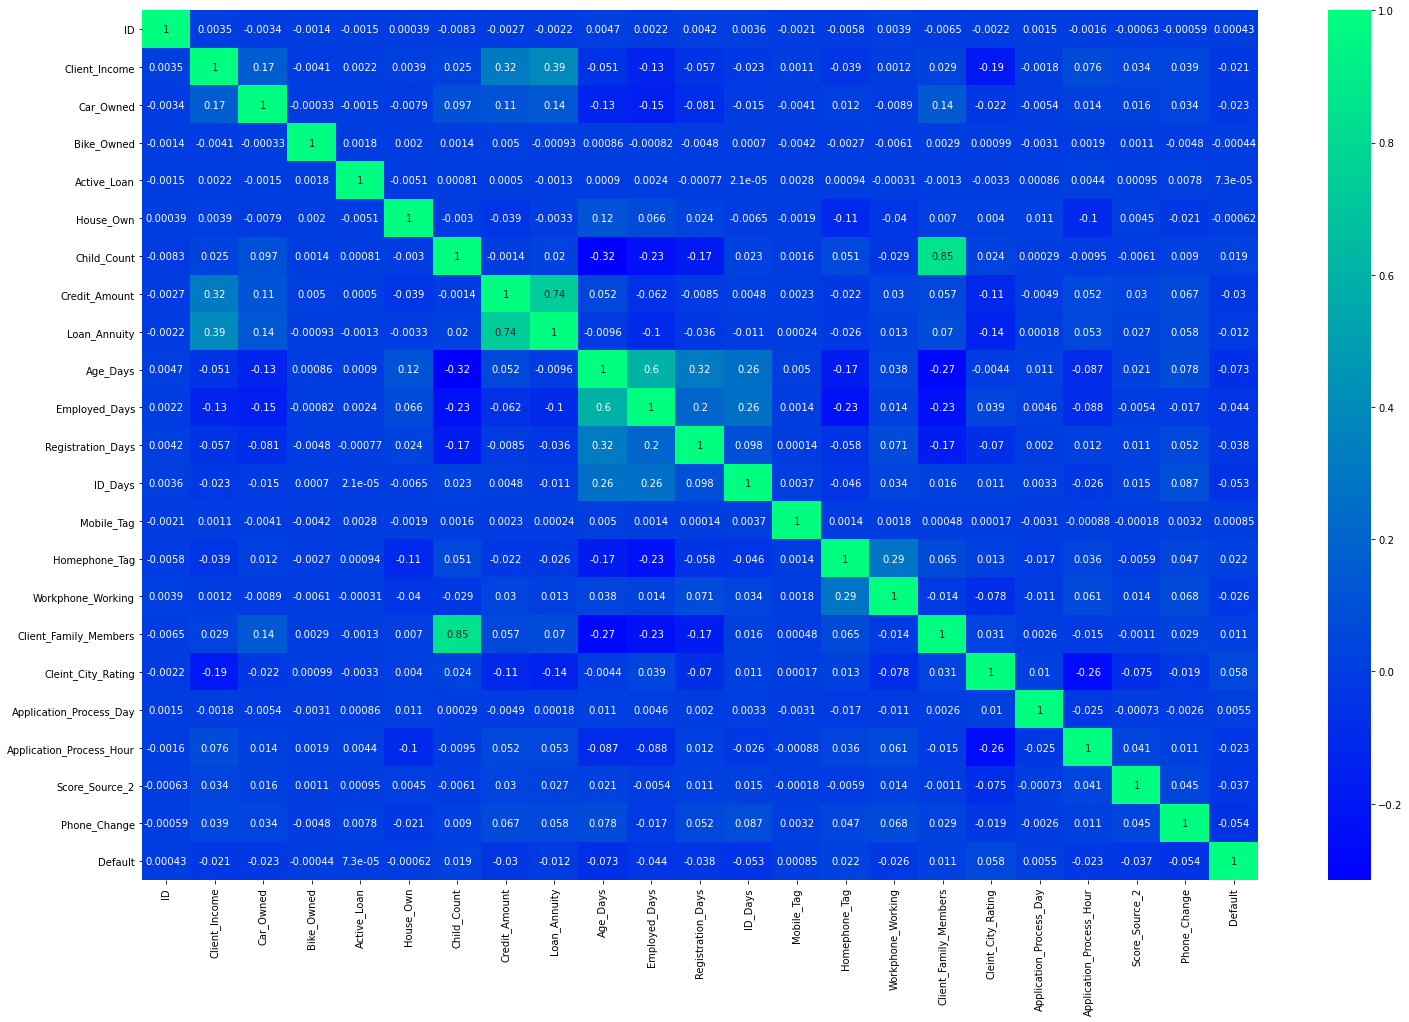

In [23]:
corr_matrix = df.corr()
plt.figure(figsize=(25,16))
sns.heatmap(corr_matrix, annot=True, cmap='winter')

From looking at the heatmap above, we can see that the 'Child_Count' and 'Client_Family_Members' features are highly correlated and show signs of collinearity. They are also weakly correlated with loan default (our target), so it'd be good to drop at least one of them. I'll drop 'Client_Family_Members' since it's technically less correlated with loan default. 

Simlarly 'Loan_Annuity' and 'Credit_Amount' have a high correlation, so I'll drop 'Loan_Annuity' and see what the effect are on our model accuracy.

In [24]:
#Drop Loan_Annuity and Client_Family_Members
new_df = df.drop(['Client_Family_Members', 'Loan_Annuity'], axis=1)

Now let's rerun our models and see how our accuracy changed. 

In [25]:
X = pd.get_dummies(new_df.drop('Default', axis=1))
y = new_df['Default']

X_train_new,X_test_new,y_train_new,y_test_new = train_test_split(X,y,test_size=0.20,random_state=42)

#Logistic Regression
logi_reg = LogisticRegression()
logi_reg.fit(X_train_new, y_train_new)
accuracy = logi_reg.score(X_test_new, y_test_new)
print("Logistic Regression accuracy: ",accuracy*100,"%")

#Decision Treee
tree = DecisionTreeClassifier()
tree.fit(X_train_new, y_train_new)
dt_accuracy = tree.score(X_test_new, y_test_new)
print("Decision tree accuracy: ",dt_accuracy*100,"%")

#Random forest
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train_new, y_train_new)
rf_accuracy = forest.score(X_test_new, y_test_new)
print("Random forest accuracy: ",rf_accuracy*100,"%")

Logistic Regression accuracy:  92.01132447070408 %
Decision tree accuracy:  86.90300344657804 %
Random forest accuracy:  92.41752831117675 %


Ok, so dropping those two features actually did not help us. The results from logistic regression did not change, and accuracy for the decision tree, and random forest actually decreased. That's obviously not what we want, and suggest these features do play some role in helping us identify loan risk, so we should keep them in our model.

The next item to look at would be hyperparameters. Since the accuracy from the random forest model was highest, I'll focus on that model, though one of the others could possibly produce better results.

### Hyperparameter tuning

In [43]:
from sklearn.model_selection import GridSearchCV

#Number of trees in a forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 30, num = 10)]
#Number of features to consider in each split
max_features = ['auto', 'sqrt']
#Max Depth of tree
max_depth = [2,4]
#Minimum number of samples to split a tree
min_samples_split = [2, 5]
#Min number of samples required at each leaf node
min_samples_leaf=[1,2]
bootstrap = [True,False]

#Create parameter grid

param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap 
}

rf_grid = GridSearchCV(estimator = forest, param_grid = param_grid, cv = 3, verbose = 2, n_jobs = 4)

In [52]:
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 11.3min
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed: 30.9min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed: 57.8min
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed: 99.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [53]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

Now that we have the best set of parameters, let's rerun the model and see how our accuracy is:

In [55]:
# Optimized Random forest
upd_forest = RandomForestClassifier(n_estimators=10, max_features='auto', max_depth=2, bootstrap = True, min_samples_leaf = 1, min_samples_split = 2)
upd_forest.fit(X_train_new, y_train_new)
upd_rf_accuracy = forest.score(X_test_new, y_test_new)
print("Random forest accuracy: ",upd_rf_accuracy*100,"%")

Random forest accuracy:  92.01132447070408 %


### Feature Importance

Elapsed time to compute the importances: 0.067 seconds


Text(0, 0.5, 'Mean decrease in impurity')

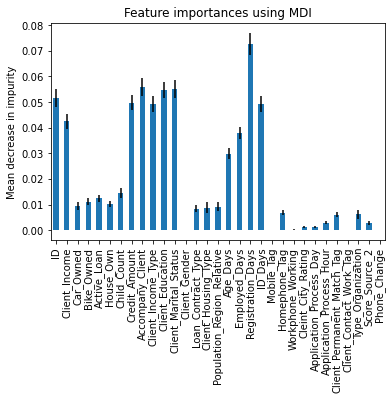

In [42]:
#Based on template code from sci-kit learn: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
import time
import numpy as np

feature_names = [f"feature {i}" for i in range(X.shape[1])]

#print(feature_names)

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(importances[:31], index=new_df.columns[:31])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std[:31], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
#fig.tight_layout()

Shown above is a bar plot of feature importances (blue), along with each feature's inter-tree variability (black error bar). I'm only showing this for demonstration purposes as it may be useful if not using a Random Forest classifier. It is not useful in our case however, as, due to the nature of Random Forest methodology, we do not need to narrow down features manually, except in the case of collinear variables.

This can be a very useful chart however, as it plainly shows what features have the most impact on the target.

## Results and Analysis

To quickly recap, in the initial run with default parameters,  we saw accuracies of:
92.01% for Logistic Regression, 86.90% for the Decision Tree, and 92.42% for the Random Forest classifier.

Moving forward with the Random Forest classifier, after tuning hyperparameters, and some fold/feature manipulation, the accuracy is currently 92.01%.

This is a slight decrease, which might seem like a bad thing at first. We can't lose sight of the fact that we started with a very high accuracy rate to begin with though. The reason that there's a very small decrease in accuracy is most likely due to our model over-fitting the data. By removing the two collinear features, and using an optimized set of hyperparameters, we may have lost a small amount of accuracy, but we gained a model that overfits to a lesser extent, and will therefore generalize better on new data sets.

## Discussion and Conclusion

Overall, I think our random forest model is a great fit for solving the problem of recognizing default risk. Due to the simplicity of the problem though, other models also make good candidates, and we may just as easily have optimized another model (e.g. Logistic Regression) and obtained results that were just as good (or better). We could also have looked at other types of models (Support Vector Machine, neural networks, etc.), but due to time constraints, I'll leave that as an exercise for the reader.

Thank you for reading and/or watching!

## References

1. meastanmay (2023, unnnamed author). NBFI Vehicle Loan repayment Dataset. Kaggle. https://www.kaggle.com/datasets/meastanmay/nbfi-vehicle-loan-repayment-dataset
 
2. Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.